In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [6]:
df = pd.read_csv('cleaned_trip_data.csv', 
                 usecols=['medallion', 'hack_license',
                          'pickup_hour', 'pickup_day_of_month', 'pickup_day_of_week',
                          'fare_amount', 'tip_amount'])

df.head()

,medallion,hack_license,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,pickup_day_of_week
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,6.0,1.0,15,25,Monday
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,5.5,3.0,15,25,Monday
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,15.0,2.0,9,25,Monday
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,14.0,2.9,6,25,Monday
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,12.0,2.0,10,25,Monday


In [8]:
driver_per_hour_and_day_of_month = df.drop_duplicates(['pickup_hour', 'pickup_day_of_month', 'medallion', 'pickup_day_of_week'])

driver_per_hour_and_day_of_month = driver_per_hour_and_day_of_month.groupby(
                ['pickup_day_of_month', 'pickup_hour', 'pickup_day_of_week'])['medallion'].count().reset_index().rename(columns={'medallion': 'drivers'})
driver_per_hour_and_day_of_month

,pickup_day_of_month,pickup_hour,pickup_day_of_week,drivers
0,1,0,Friday,9835
1,1,1,Friday,9036
2,1,2,Friday,7733
3,1,3,Friday,6112
4,1,4,Friday,4423
...,...,...,...,...
715,30,19,Saturday,10150
716,30,20,Saturday,10119
717,30,21,Saturday,10004
718,30,22,Saturday,10036


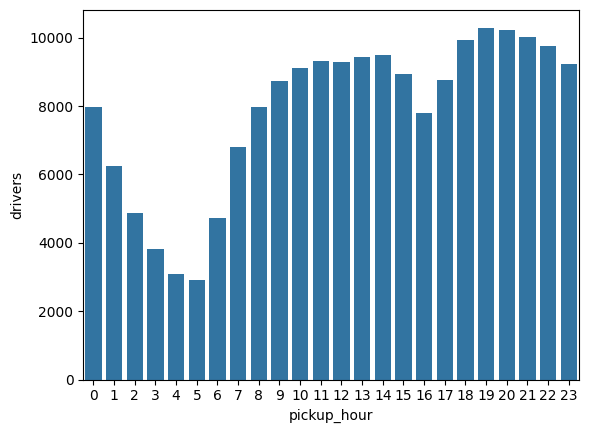

In [10]:
drivers_working_per_hour = driver_per_hour_and_day_of_month.groupby('pickup_hour')['drivers'].mean().reset_index()

sns.barplot(data=drivers_working_per_hour,
           x='pickup_hour', y='drivers')
plt.show()

In [15]:
driver_per_hour_and_day_of_month = df.drop_duplicates(['pickup_hour', 'pickup_day_of_month', 'medallion', 'pickup_day_of_week'])

driver_per_hour_and_day_of_month = driver_per_hour_and_day_of_month.groupby(
                ['pickup_day_of_month', 'pickup_hour', 'pickup_day_of_week'])['medallion'].count().reset_index().rename(columns={'medallion': 'drivers'})
driver_per_hour_and_day_of_month

,pickup_day_of_month,pickup_hour,pickup_day_of_week,drivers
0,1,0,Friday,9835
1,1,1,Friday,9036
2,1,2,Friday,7733
3,1,3,Friday,6112
4,1,4,Friday,4423
...,...,...,...,...
715,30,19,Saturday,10150
716,30,20,Saturday,10119
717,30,21,Saturday,10004
718,30,22,Saturday,10036


In [14]:
driver_per_hour_and_day_of_month['sum'] / driver_per_hour_and_day_of_month['count']

0      14.270844
1      14.319173
2      14.035390
3      14.593022
4      16.623163
         ...    
715    13.563448
716    13.699657
717    13.647341
718    13.866464
719    13.928259
Length: 720, dtype: float64

In [17]:

earnings_per_hour_and_day_of_month = df.groupby(
               ['pickup_day_of_month', 'pickup_hour', 'pickup_day_of_week'])['fare_amount'].sum().reset_index() #.rename(columns={'medallion': 'drivers'})
earnings_per_hour_and_day_of_month

,pickup_day_of_month,pickup_hour,pickup_day_of_week,fare_amount
0,1,0,Friday,330751.25
1,1,1,Friday,294836.05
2,1,2,Friday,243025.17
3,1,3,Friday,179944.55
4,1,4,Friday,129616.25
...,...,...,...,...
715,30,19,Saturday,323297.52
716,30,20,Saturday,282766.83
717,30,21,Saturday,276829.50
718,30,22,Saturday,300086.33


In [19]:
earnings_per_hour_and_day_of_month['earnings_per_driver'] = earnings_per_hour_and_day_of_month['fare_amount'] / driver_per_hour_and_day_of_month['drivers']

earnings_per_hour_and_day_of_month

,pickup_day_of_month,pickup_hour,pickup_day_of_week,fare_amount,earnings_per_driver
0,1,0,Friday,330751.25,33.630020
1,1,1,Friday,294836.05,32.629045
2,1,2,Friday,243025.17,31.427023
3,1,3,Friday,179944.55,29.441189
4,1,4,Friday,129616.25,29.305053
...,...,...,...,...,...
715,30,19,Saturday,323297.52,31.851972
716,30,20,Saturday,282766.83,27.944148
717,30,21,Saturday,276829.50,27.671881
718,30,22,Saturday,300086.33,29.900989


In [60]:
earnings_per_hour_and_day_of_month.loc[earnings_per_hour_and_day_of_month['pickup_day_of_week'].isin(['Monday', 
                                                                                                'Tuesday', 
                                                                                                'Wednesday',
                                                                                               'Thursday',
                                                                                               'Friday'])].groupby('pickup_hour')['earnings_per_driver'].mean().reset_index()

,pickup_hour,earnings_per_driver
0,0,25.370302
1,1,22.338139
2,2,21.617502
3,3,21.792056
4,4,25.633413
5,5,26.552318
6,6,26.336242
7,7,30.298004
8,8,31.185606
9,9,29.071559


/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_9759/1245870770.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp,


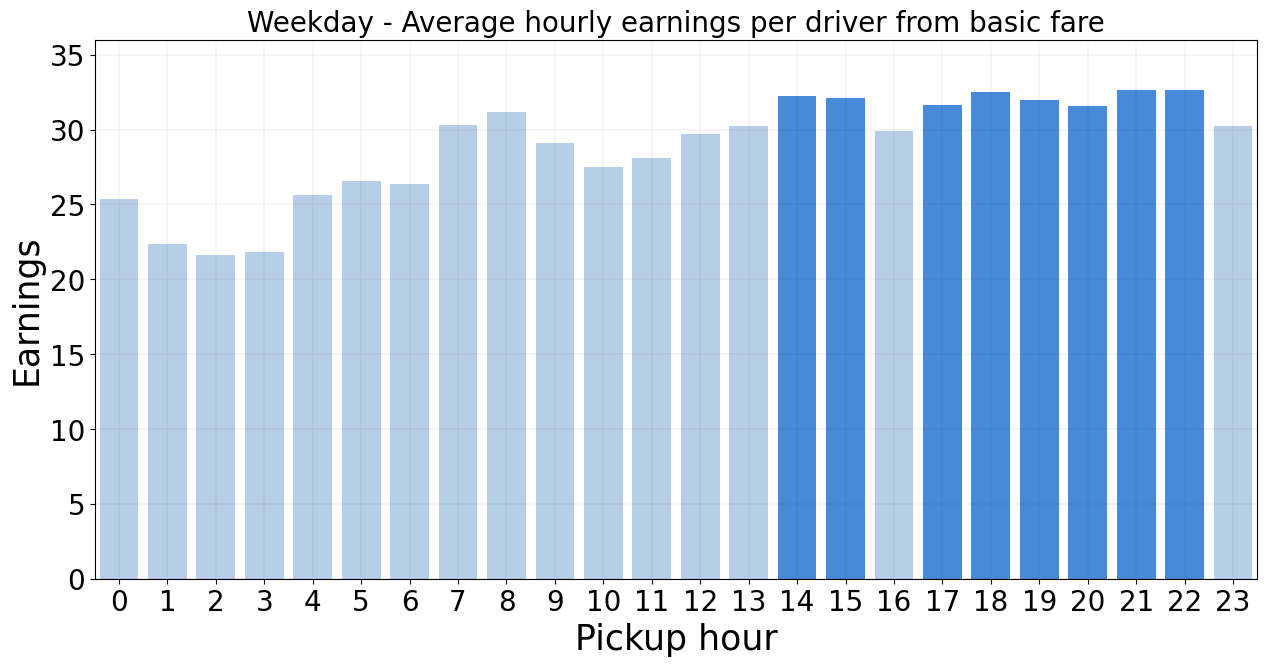

In [62]:
temp = earnings_per_hour_and_day_of_month.loc[earnings_per_hour_and_day_of_month['pickup_day_of_week'].isin(['Monday', 
                                                                                                'Tuesday', 
                                                                                                'Wednesday',
                                                                                               'Thursday',
                                                                                               'Friday'])].groupby('pickup_hour')['earnings_per_driver'].mean().reset_index()


# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

values=temp.earnings_per_driver
color_cutoff = values.sort_values(ascending=False).tolist()[7]
clrs = ['#3088F2' if x >= color_cutoff else '#AFCDF1' for x in values ]

sns.barplot(data=temp,
            x='pickup_hour', 
            y='earnings_per_driver',
           errorbar=None,
           palette=clrs)

plt.ylim(0, 36)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Weekday - Average hourly earnings per driver from basic fare",fontsize=20)
ax.set_xlabel("Pickup hour",fontsize=25)
ax.set_ylabel("Earnings",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 20);
ax.xaxis.set_tick_params(labelsize = 20);

plt.grid(True, color='black', linewidth=.05)

plt.show()

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_9759/947372845.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp,


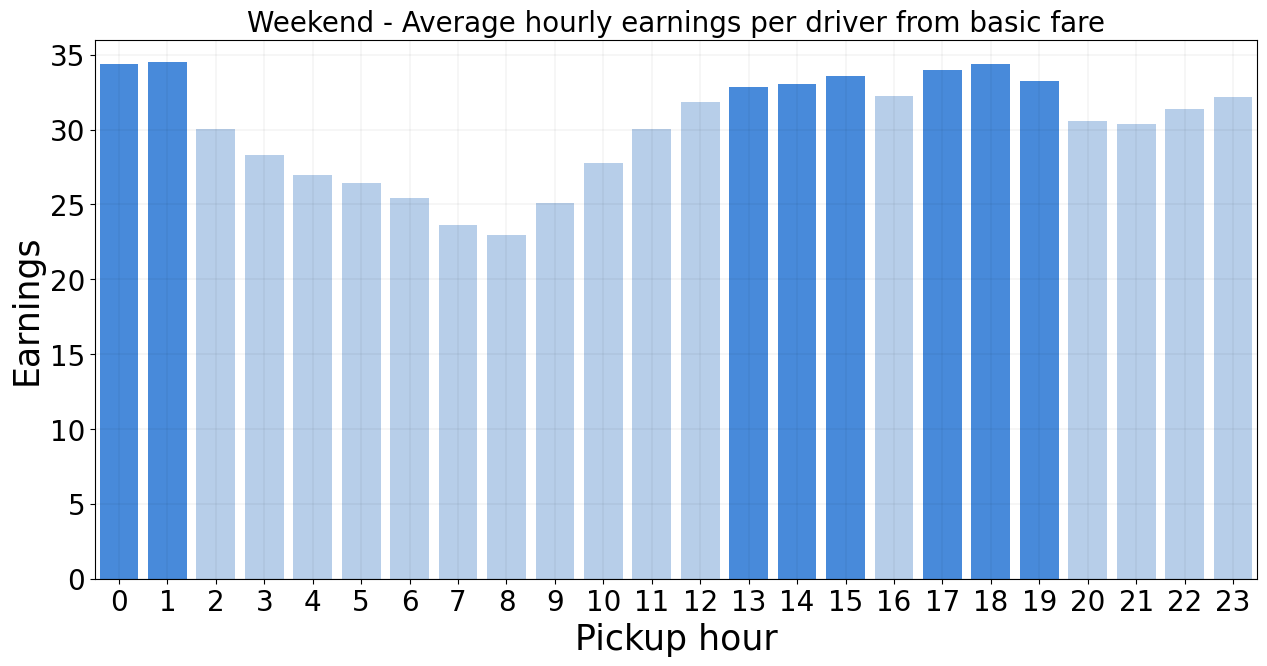

In [63]:
temp = earnings_per_hour_and_day_of_month.loc[earnings_per_hour_and_day_of_month['pickup_day_of_week'].isin(['Saturday', 
                                                                                                'Sunday', 
                                                                                                ])].groupby('pickup_hour')['earnings_per_driver'].mean().reset_index()


# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

values=temp.earnings_per_driver
color_cutoff = values.sort_values(ascending=False).tolist()[7]
clrs = ['#3088F2' if x >= color_cutoff else '#AFCDF1' for x in values ]

sns.barplot(data=temp,
            x='pickup_hour', 
            y='earnings_per_driver',
           errorbar=None,
           palette=clrs)

plt.ylim(0, 36)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Weekend - Average hourly earnings per driver from basic fare",fontsize=20)
ax.set_xlabel("Pickup hour",fontsize=25)
ax.set_ylabel("Earnings",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 20);
ax.xaxis.set_tick_params(labelsize = 20);

plt.grid(True, color='black', linewidth=.05)

plt.show()

In [ ]:
clrs = ['green' if x > color_cutoff else 'blue' for x in values ]


In [49]:
color_cutoff

31.250229311207214